<a href="https://colab.research.google.com/github/zaedulislam/CU_COMP_478_6771-Image_Processing_Lab/blob/main/Tutorial%203%20-%20COMP%20478.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3 - COMP 478

## Import Python Modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

print(cv2.__version__, cv2.__spec__)
# print(cv2.getBuildInformation())

4.1.2 ModuleSpec(name='cv2.cv2', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7f216fcee950>, origin='/usr/local/lib/python3.7/dist-packages/cv2/cv2.cpython-37m-x86_64-linux-gnu.so')


## Mount Google Drive
* First mount and authenticate yourself with the following code
* After executing the cell below, Drive files will be present in "/content/drive/My Drive".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Print the contents in the current folder

In [ ]:
os.listdir()

['Tutorial 3 - COMP 478.ipynb',
 'Images',
 'Tutorial 1 - COMP 478.ipynb',
 'Tutorial 2 - COMP 478.ipynb']

* Second change your current folder to point working folder My Drive

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/COMP 478 6771 - Image Processing/")

## Arithmatic Operations

In [ ]:
image1 = cv2.imread('./Images/boat.png') 
image2 = cv2.imread('./Images/cameraman.png') 

### Image Addition

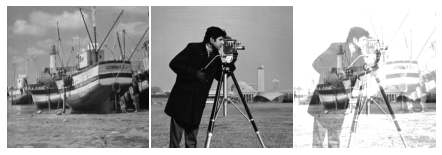

In [ ]:
addedImage = cv2.add(image1, image2)

plt.figure('Image Addition') 
plt.subplot(131), plt.imshow(image1), plt.axis('off') 
plt.subplot(132), plt.imshow(image2), plt.axis('off') 
plt.subplot(133), plt.imshow(addedImage), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

### Image Subtraction

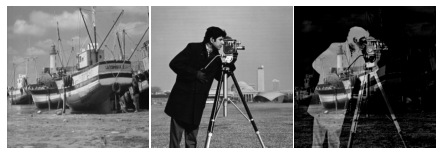

In [ ]:
subtractedImage = cv2.subtract(image1, image2)

plt.figure('Image Subtraction') 
plt.subplot(131), plt.imshow(image1), plt.axis('off') 
plt.subplot(132), plt.imshow(image2), plt.axis('off') 
plt.subplot(133), plt.imshow(subtractedImage), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

### Image Blending

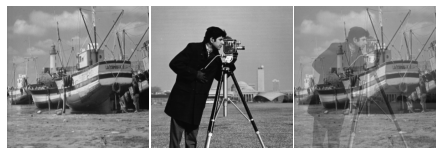

In [ ]:
# # resize image
# resized = cv2.resize(I, (256, 256), interpolation = cv2.INTER_AREA)
# #print('Resized Dimensions : ',resized.shape)
# cv2.imwrite('gato.png', resized)

alpha = 0.3
blendedImage = cv2.addWeighted(image1, 1 - alpha, image2, alpha, 0) 

plt.figure('Image blending') 
plt.subplot(131), plt.imshow(image1), plt.axis('off') 
plt.subplot(132), plt.imshow(image2), plt.axis('off') 
plt.subplot(133), plt.imshow(blendedImage), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

In [ ]:

#J = cv2.absdiff(I1, I2)
#J = cv2.multiply(I1, I2)
#J = cv2.divide(I1, I2)
#J = cv2.bitwise_and(I1, I2)
#J = cv2.bitwise_or(I1, I2)

## Spatial Transformations

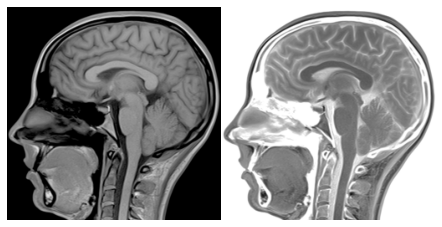

In [ ]:
I = cv2.imread('./Images/head.png')  

# Image negatives, s = T(r) = L - 1 - r 

# Subtract the image from maximum pixel value(calculated from dtype)
negativeImage = 255 - I # Image Binarization

plt.figure('Image Negative') 
plt.subplot(121), plt.imshow(I), plt.axis('off') 
plt.subplot(122), plt.imshow(negativeImage), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

### Log Transformation

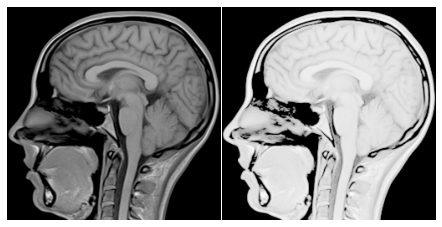

In [ ]:
c = 255/(np.log(1 + np.max(I)))  
I_log = c * np.log(1 + I)  

# Specify the data type. 
I_log = np.array(I_log, dtype = np.uint8)  
plt.figure('Log transformation') 
plt.subplot(121), plt.imshow(I), plt.axis('off') 
plt.subplot(122), plt.imshow(I_log), plt.axis('off')
plt.tight_layout(pad=.2) 
plt.show()

### Power-Law (Gamma) Transformation
* Trying 4 gamma values, gamma in [0.1, 0.5, 1.2, 2.2]
* Apply gamma correction

#### gamma = 0.1

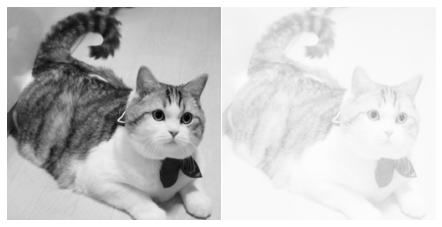

In [ ]:
gamma = 0.1
I_gamma = np.array(255*(I / 255) ** gamma, dtype = 'uint8')  
plt.figure('Power-Law (Gamma) Transformation') 
plt.subplot(121), plt.imshow(I), plt.axis('off') 
plt.subplot(122), plt.imshow(I_gamma), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

#### gamma = 0.5

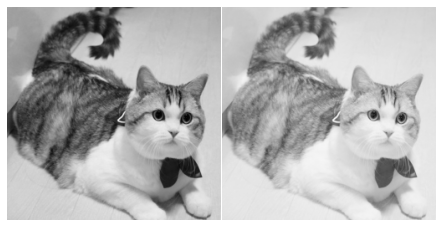

In [ ]:
gamma = 0.5
I_gamma = np.array(255*(I / 255) ** gamma, dtype = 'uint8')  
plt.figure('Power-Law (Gamma) Transformation') 
plt.subplot(121), plt.imshow(I), plt.axis('off') 
plt.subplot(122), plt.imshow(I_gamma), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

#### gamma = 1.2

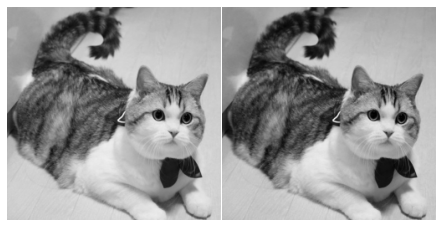

In [ ]:
gamma = 1.2
I_gamma = np.array(255*(I / 255) ** gamma, dtype = 'uint8')  
plt.figure('Power-Law (Gamma) Transformation') 
plt.subplot(121), plt.imshow(I), plt.axis('off') 
plt.subplot(122), plt.imshow(I_gamma), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

#### gamma = 2.2

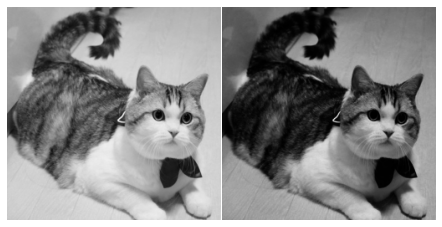

In [ ]:
gamma = 2.2
I_gamma = np.array(255*(I / 255) ** gamma, dtype = 'uint8')  
plt.figure('Power-Law (Gamma) Transformation') 
plt.subplot(121), plt.imshow(I), plt.axis('off') 
plt.subplot(122), plt.imshow(I_gamma), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

## Piece-wise Linear Transformations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


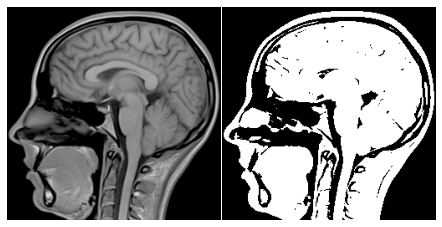

In [ ]:
# Function to map each intensity level to output intensity level. 
def pixelVal(pix, r1, s1, r2, s2):  
  if (0 <= pix and pix <= r1):  
    return (s1 / r1)*pix  
  elif (r1 < pix and pix <= r2):  
    return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1  
  else:  
    return ((255 - s2)/(255 - r2)) * (pix - r2) + s2  
    
# Define parameters. 
r1 = 70 
s1 = 0 
r2 = 140 
s2 = 255 

# Vectorize the function to apply it to each value in the Numpy array. 
pixelVal_vec = np.vectorize(pixelVal)  

# Apply contrast stretching. 
I_contrast_stretched = pixelVal_vec(I, r1, s1, r2, s2)  
plt.figure('Piece-wise Linear Transformation') 
plt.subplot(121), plt.imshow(I), plt.axis('off') 
plt.subplot(122), plt.imshow(I_contrast_stretched), plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show()

## Image Histogram 

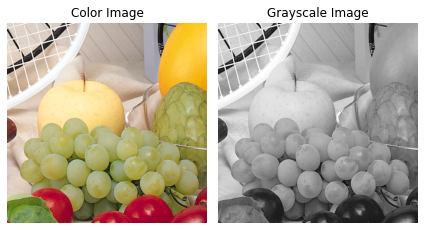

In [ ]:
# OpenCV follows BGR order, while plt follows RGB order
I = cv2.imread('./Images/fruits.png')

I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB) 
J = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
 
plt.figure('Color and Grascale Images') 
plt.subplot(121), plt.imshow(I), plt.title('Color Image'),  
plt.axis('off') 
plt.subplot(122), plt.imshow(J, cmap ='gray'), plt.title('Grayscale Image'),  
plt.axis('off') 
plt.tight_layout() 
plt.show()

### Histogram for Grayscale Image

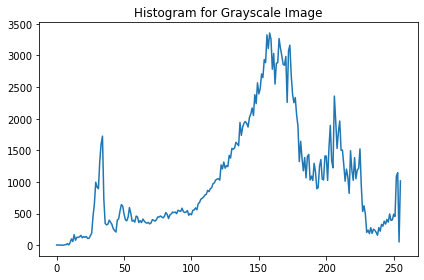

In [ ]:
# Find frequency of pixels in range 0-255
h = cv2.calcHist([J], [0], None, [256], [0,256]) 

plt.plot(h) 
plt.title('Histogram for Grayscale Image') 
plt.tight_layout() 
plt.show()

### Alternative Way to Compute Histogram of an Image


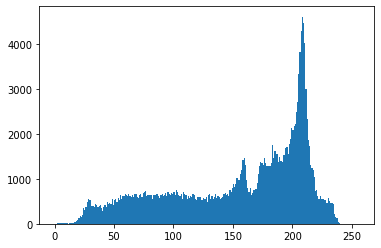

In [ ]:
plt.figure('Image Histogram 2') 
I = cv2.imread('./Images/chat.png') 
plt.hist(I.ravel(), 256, [0, 256]) 
plt.show() 

### Normalized Histogram for Grayscale Image

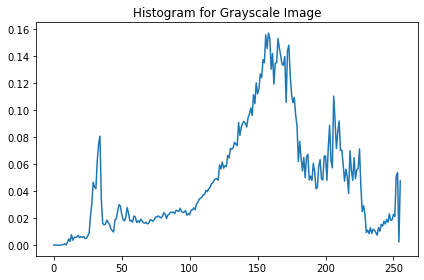

In [ ]:
h = cv2.normalize(h, h).flatten()

plt.plot(h) 
plt.title('Histogram for Grayscale Image') 
plt.tight_layout() 
plt.show()

### Histogram for RGB Image

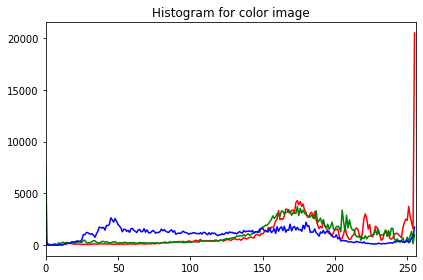

In [ ]:
color = ('r','g','b') 

for channel,col in enumerate(color):    
  h = cv2.calcHist([I],[channel],None,[256],[0,256]) 
  #h = cv2.normalize(h, h).flatten()   
  plt.plot(h,color = col)    
  plt.xlim([0,256]) 
  
plt.title('Histogram for color image') 
plt.tight_layout() 
plt.show()

### Normalized Histogram for RGB Image

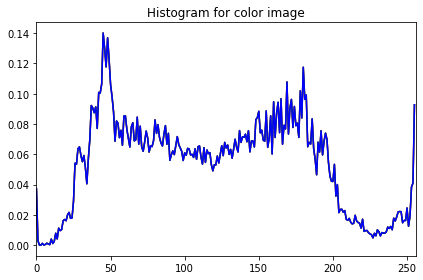

In [ ]:
color = ('r','g','b') 

for channel,col in enumerate(color):    
  h = cv2.normalize(h, h).flatten()   
  plt.plot(h,color = col)    
  plt.xlim([0,256]) 
  
plt.title('Histogram for color image') 
plt.tight_layout() 
plt.show()

### Histogram Equalization

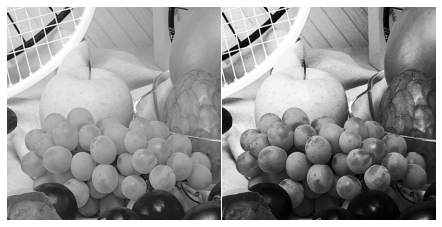

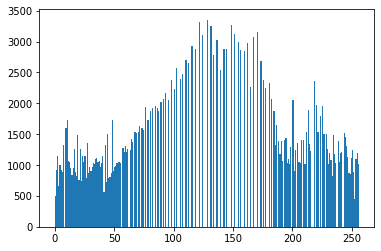

In [ ]:
J_equalized = cv2.equalizeHist(J) 
plt.subplot(121), plt.imshow(J, cmap ='gray'), 
plt.axis('off') 
plt.subplot(122), plt.imshow(J_equalized, cmap ='gray'), 
plt.axis('off') 
plt.tight_layout(pad=.2) 
plt.show() 

plt.hist(J_equalized.ravel(), 256, [0,256]) 
plt.show()

## Image Noise model

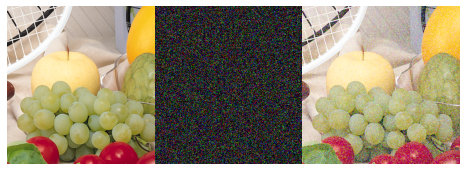

In [ ]:
I = cv2.imread('./Images/fruits.png') 
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB) 

# Generate Gaussian noise
noise = np.random.normal(0,1,I.size) 
noise = noise.reshape(I.shape[0],I.shape[1],I.shape[2]).astype('uint8') 

# Add the Gaussian noise to the image
I_noisy = cv2.add(I,noise) 
plt.figure('Image noise') 
plt.subplot(131), plt.imshow(I), plt.axis('off') 
plt.subplot(132), plt.imshow(noise), plt.axis('off') 
plt.subplot(133), plt.imshow(I_noisy), plt.axis('off') 
plt.tight_layout(pad=-1) 
plt.show() 

# plt.figure('Image noisy')
# Ic = cv2.hconcat([I,noise,I_noisy])
# plt.imshow(Ic), plt.axis('off')
# plt.show()